In [1]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
from sklearn.model_selection import cross_val_score
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn import neighbors
from scipy import stats

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [2]:
df = pd.read_csv(r"C:\Users\nstow\Desktop\Python\Life Expectancy Data.csv")

df.columns = ['country', 'year', 'status', 'lifeExpectancy', 'adultMortality', 'infantDeaths', 'alcohol', \
              'percentageExpenditure', 'hepB', 'measles', 'BMI', 'underFiveDeaths', 'polio', 'totalExpenditure', 'diptheria',\
              'HIV', 'GDP', 'population', 'thinness1to19', 'thinness5to9', 'incomeComposition', 'schooling']

df['country'] = df['country'].astype(str)
df = df[df['country'].str.contains('India')]

In [3]:
df.head()

,country,year,status,lifeExpectancy,adultMortality,infantDeaths,alcohol,percentageExpenditure,hepB,measles,...,polio,totalExpenditure,diptheria,HIV,GDP,population,thinness1to19,thinness5to9,incomeComposition,schooling
1186,India,2015,Developing,68.300,181.000,910,nan,0.000,87.000,90387,...,86.000,nan,87.000,0.200,1613.189,1395398.000,26.700,27.300,0.615,11.600
1187,India,2014,Developing,68.000,184.000,957,3.070,86.522,79.000,79563,...,84.000,4.690,85.000,0.200,1573.119,1293859294.000,26.800,27.400,0.607,11.600
1188,India,2013,Developing,67.600,187.000,1000,3.110,67.672,7.000,13822,...,82.000,4.530,83.000,0.200,1452.195,127856227.000,26.800,27.500,0.599,11.500
1189,India,2012,Developing,67.300,19.000,1100,3.100,64.970,73.000,18668,...,79.000,4.390,82.000,0.200,1446.985,126365852.000,26.900,27.600,0.590,11.300
1190,India,2011,Developing,66.800,193.000,1100,3.000,64.606,44.000,33634,...,79.000,4.330,82.000,0.200,1461.672,124723629.000,26.900,27.700,0.580,10.800


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1186 to 1201
Data columns (total 22 columns):
country                  16 non-null object
year                     16 non-null int64
status                   16 non-null object
lifeExpectancy           16 non-null float64
adultMortality           16 non-null float64
infantDeaths             16 non-null int64
alcohol                  15 non-null float64
percentageExpenditure    16 non-null float64
hepB                     12 non-null float64
measles                  16 non-null int64
BMI                      16 non-null float64
underFiveDeaths          16 non-null int64
polio                    16 non-null float64
totalExpenditure         15 non-null float64
diptheria                16 non-null float64
HIV                      16 non-null float64
GDP                      16 non-null float64
population               16 non-null float64
thinness1to19            16 non-null float64
thinness5to9             16 non-null float64
in

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 1186 to 1201
Data columns (total 22 columns):
country                  16 non-null object
year                     16 non-null int64
status                   16 non-null object
lifeExpectancy           16 non-null float64
adultMortality           16 non-null float64
infantDeaths             16 non-null int64
alcohol                  15 non-null float64
percentageExpenditure    16 non-null float64
hepB                     12 non-null float64
measles                  16 non-null int64
BMI                      16 non-null float64
underFiveDeaths          16 non-null int64
polio                    16 non-null float64
totalExpenditure         15 non-null float64
diptheria                16 non-null float64
HIV                      16 non-null float64
GDP                      16 non-null float64
population               16 non-null float64
thinness1to19            16 non-null float64
thinness5to9             16 non-null float64
in

## OLS Regression

Text(0.5, 1.0, 'Life Expectancy vs Schooling')

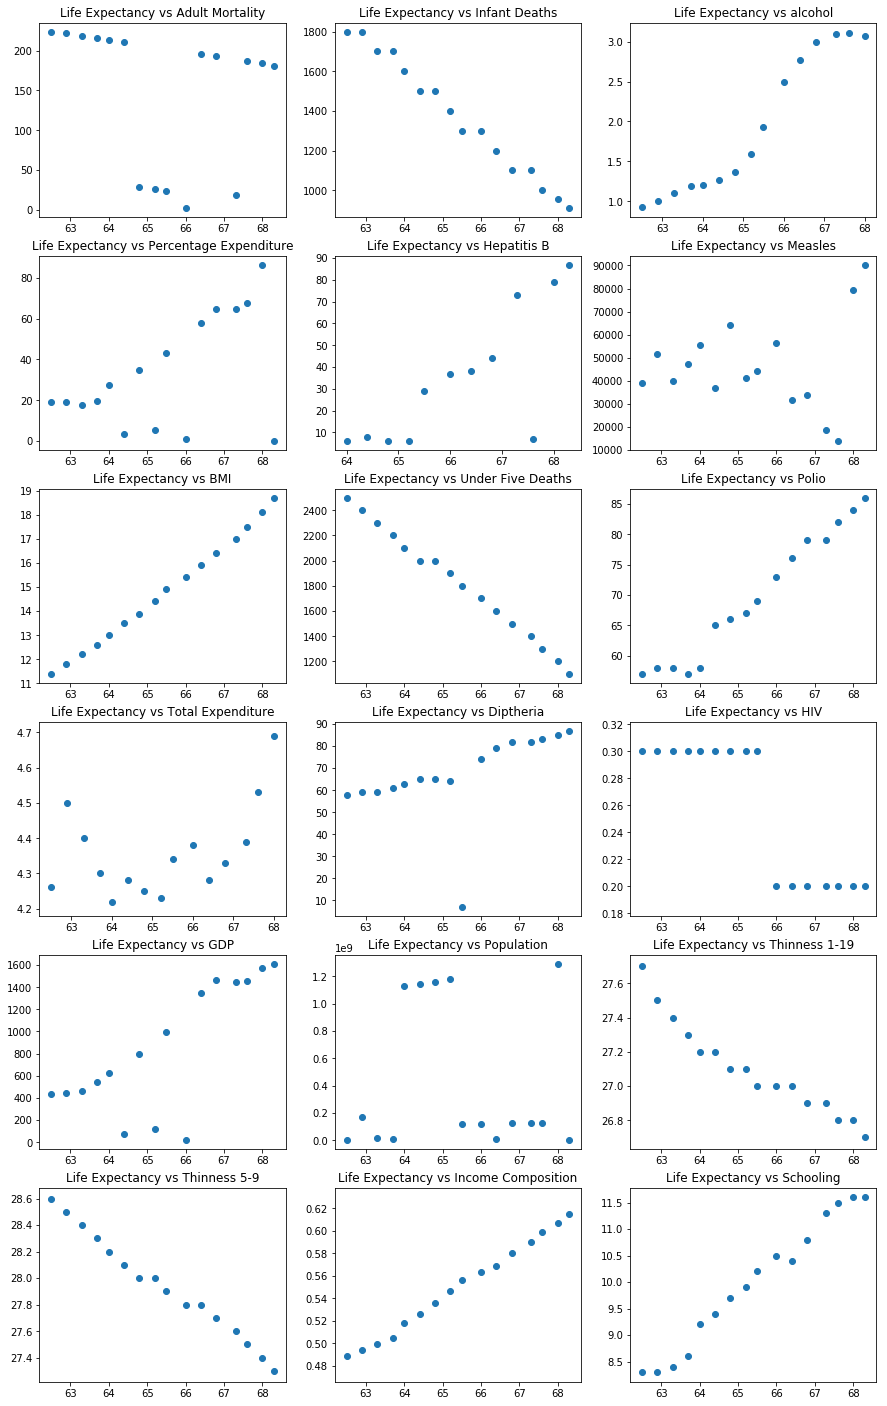

In [7]:
## plot the relationship between quality and other variables
plt.figure(figsize = (15,25))

plt.subplot(6,3,1)
plt.scatter(df['lifeExpectancy'], df['adultMortality'])
plt.title('Life Expectancy vs Adult Mortality')

plt.subplot(6,3,2)
plt.scatter(df['lifeExpectancy'], df['infantDeaths'])
plt.title('Life Expectancy vs Infant Deaths')

plt.subplot(6,3,3)
plt.scatter(df['lifeExpectancy'], df['alcohol'])
plt.title('Life Expectancy vs alcohol')

plt.subplot(6,3,4)
plt.scatter(df['lifeExpectancy'], df['percentageExpenditure'])
plt.title('Life Expectancy vs Percentage Expenditure')

plt.subplot(6,3,5)
plt.scatter(df['lifeExpectancy'], df['hepB'])
plt.title('Life Expectancy vs Hepatitis B')

plt.subplot(6,3,6)
plt.scatter(df['lifeExpectancy'], df['measles'])
plt.title('Life Expectancy vs Measles')

plt.subplot(6,3,7)
plt.scatter(df['lifeExpectancy'], df['BMI'])
plt.title('Life Expectancy vs BMI')

plt.subplot(6,3,8)
plt.scatter(df['lifeExpectancy'], df['underFiveDeaths'])
plt.title('Life Expectancy vs Under Five Deaths')

plt.subplot(6,3,9)
plt.scatter(df['lifeExpectancy'], df['polio'])
plt.title('Life Expectancy vs Polio')

plt.subplot(6,3,10)
plt.scatter(df['lifeExpectancy'], df['totalExpenditure'])
plt.title('Life Expectancy vs Total Expenditure')

plt.subplot(6,3,11)
plt.scatter(df['lifeExpectancy'], df['diptheria'])
plt.title('Life Expectancy vs Diptheria')

plt.subplot(6,3,12)
plt.scatter(df['lifeExpectancy'], df['HIV'])
plt.title('Life Expectancy vs HIV')

plt.subplot(6,3,13)
plt.scatter(df['lifeExpectancy'], df['GDP'])
plt.title('Life Expectancy vs GDP')

plt.subplot(6,3,14)
plt.scatter(df['lifeExpectancy'], df['population'])
plt.title('Life Expectancy vs Population')

plt.subplot(6,3,15)
plt.scatter(df['lifeExpectancy'], df['thinness1to19'])
plt.title('Life Expectancy vs Thinness 1-19')

plt.subplot(6,3,16)
plt.scatter(df['lifeExpectancy'], df['thinness5to9'])
plt.title('Life Expectancy vs Thinness 5-9')

plt.subplot(6,3,17)
plt.scatter(df['lifeExpectancy'], df['incomeComposition'])
plt.title('Life Expectancy vs Income Composition')

plt.subplot(6,3,18)
plt.scatter(df['lifeExpectancy'], df['schooling'])
plt.title('Life Expectancy vs Schooling')

,year,lifeExpectancy,adultMortality,infantDeaths,alcohol,percentageExpenditure,hepB,measles,BMI,underFiveDeaths,polio,totalExpenditure,diptheria,HIV,GDP,population,thinness1to19,thinness5to9,incomeComposition,schooling
year,1.000,1.000,-0.279,-0.996,0.960,0.512,0.792,0.137,0.998,-0.998,0.983,0.458,0.511,-0.861,0.759,-0.000,-0.969,-0.996,0.999,0.991
lifeExpectancy,1.000,1.000,-0.274,-0.995,0.964,0.522,0.792,0.125,0.998,-0.998,0.984,0.468,0.526,-0.869,0.763,-0.008,-0.965,-0.995,0.998,0.991
adultMortality,-0.279,-0.274,1.000,0.254,-0.259,0.026,0.056,0.016,-0.246,0.232,-0.226,0.150,0.221,0.093,0.098,-0.145,0.344,0.296,-0.291,-0.341
infantDeaths,-0.996,-0.995,0.254,1.000,-0.961,-0.532,-0.768,-0.096,-0.994,0.994,-0.986,-0.450,-0.487,0.858,-0.767,0.013,0.957,0.988,-0.996,-0.990
alcohol,0.960,0.964,-0.259,-0.961,1.000,0.775,0.728,-0.264,0.966,-0.960,0.972,0.481,0.519,-0.949,0.758,-0.137,-0.876,-0.935,0.960,0.948
percentageExpenditure,0.512,0.522,0.026,-0.532,0.775,1.000,0.275,-0.275,0.509,-0.508,0.523,0.549,0.238,-0.518,0.756,0.018,-0.450,-0.478,0.516,0.530
hepB,0.792,0.792,0.056,-0.768,0.728,0.275,1.000,0.402,0.800,-0.799,0.769,0.614,0.387,-0.694,0.637,-0.383,-0.753,-0.795,0.787,0.762
measles,0.137,0.125,0.016,-0.096,-0.264,-0.275,0.402,1.000,0.155,-0.143,0.109,0.189,0.070,0.009,0.053,0.303,-0.160,-0.183,0.132,0.093
BMI,0.998,0.998,-0.246,-0.994,0.966,0.509,0.800,0.155,1.000,-0.998,0.987,0.497,0.527,-0.868,0.774,-0.021,-0.956,-0.993,0.998,0.988
underFiveDeaths,-0.998,-0.998,0.232,0.994,-0.960,-0.508,-0.799,-0.143,-0.998,1.000,-0.981,-0.480,-0.530,0.864,-0.765,0.002,0.965,0.995,-0.996,-0.987


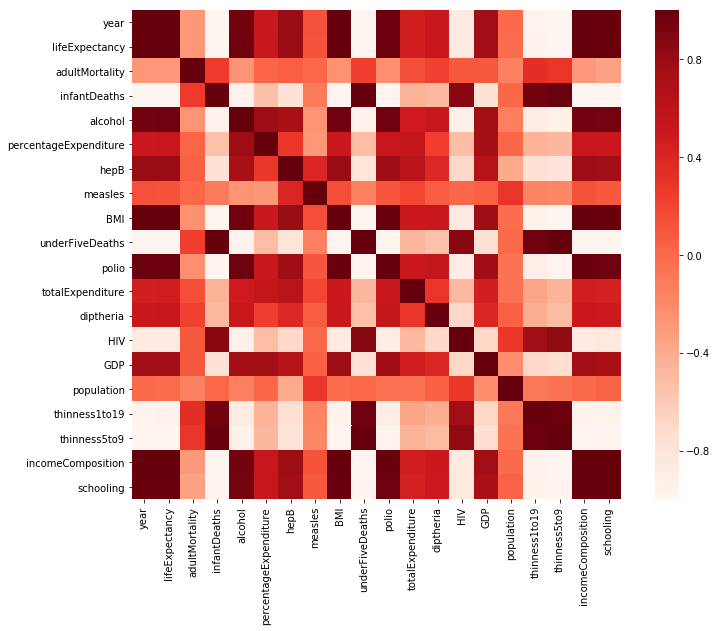

In [8]:
corrmat = df.corr()
display(corrmat)

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True, cmap="Reds")
plt.show()

In [9]:
## perform linear Regression on the most linear features that are least correlated
regr = linear_model.LinearRegression()
Y = df['lifeExpectancy'].values.reshape(-1, 1)
X = df[['incomeComposition']]
regr.fit(X, Y)

print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[44.54673681]]

Intercept: 
 [40.94031812]

R-squared:
0.9959956337242925


Text(0, 0.5, 'Count')

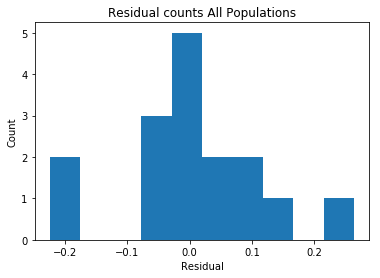

In [10]:
predicted = regr.predict(X).ravel()
actual = df['lifeExpectancy']
residual = actual - predicted

plt.hist(residual)
plt.title('Residual counts All Populations')
plt.xlabel('Residual')
plt.ylabel('Count')

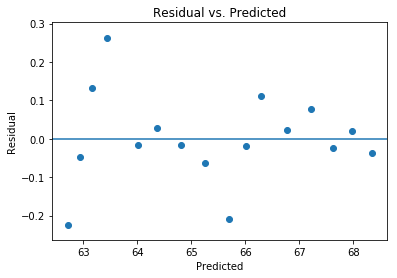

In [11]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [12]:
linear_formula = 'lifeExpectancy ~ incomeComposition'

# Fit the model to our data using the formula.
lm = smf.ols(formula=linear_formula, data=df).fit()

In [13]:
lm.params

Intercept           40.940
incomeComposition   44.547
dtype: float64

In [14]:
lm.pvalues

Intercept           0.000
incomeComposition   0.000
dtype: float64

In [15]:
lm.rsquared

0.9959956337242922

## NKK Regression

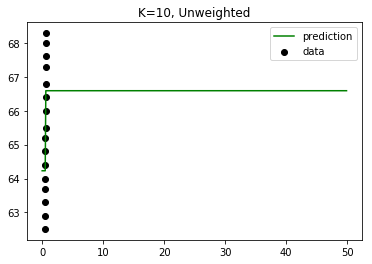

Unweighted Accuracy: -25.53 (+/- 51.30)


In [16]:
# Build our model.
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(df.incomeComposition)
Y = df.lifeExpectancy
knn.fit(X, Y)

# Set up our prediction line.
T = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

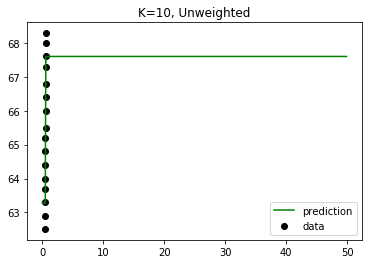

Unweighted Accuracy: -8.90 (+/- 21.87)


In [22]:
# Build our model.
knn3 = neighbors.KNeighborsRegressor(n_neighbors=5)
X3 = pd.DataFrame(df.incomeComposition)
Y3 = df.lifeExpectancy
knn3.fit(X3, Y3)

# Set up our prediction line.
T3 = np.arange(0, 50, 0.1)[:, np.newaxis]

# Trailing underscores are a common convention for a prediction.
Y3_ = knn3.predict(T3)

plt.scatter(X3, Y3, c='k', label='data')
plt.plot(T3, Y3_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()

score3 = cross_val_score(knn3, X3, Y3, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score3.mean(), score3.std() * 2))

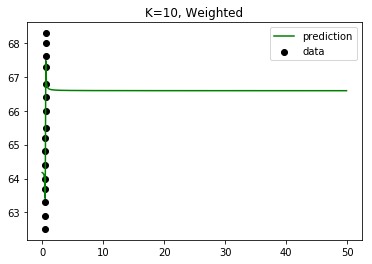

Weighted Accuracy: -12.97 (+/- 31.14)


In [23]:
# Run the same model, this time with weights.
knn1 = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X1 = pd.DataFrame(df.incomeComposition)
Y1 = df.lifeExpectancy
knn1.fit(X1, Y1)

# Set up our prediction line.
T1 = np.arange(0, 50, 0.1)[:, np.newaxis]

Y1_ = knn1.predict(T1)

plt.scatter(X1, Y1, c='k', label='data')
plt.plot(T1, Y1_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

score1 = cross_val_score(knn1, X1, Y1, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score1.mean(), score1.std() * 2))

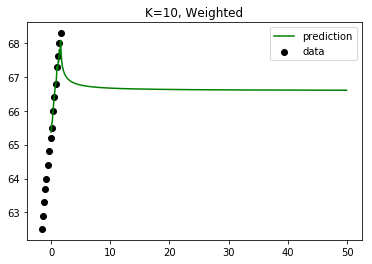

Weighted Accuracy with z Score: -12.97 (+/- 31.14)


In [24]:
# Run the same model, this time with weights.
knn2 = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X2 = pd.DataFrame({'incomeComposition': stats.zscore(df.incomeComposition)})
Y2 = df.lifeExpectancy
knn2.fit(X2, Y2)

# Set up our prediction line.
T2 = np.arange(0, 50, 0.1)[:, np.newaxis]

Y2_ = knn2.predict(T2)

plt.scatter(X2, Y2, c='k', label='data')
plt.plot(T2, Y2_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

score2 = cross_val_score(knn2, X2, Y2, cv=5)
print("Weighted Accuracy with z Score: %0.2f (+/- %0.2f)" % (score2.mean(), score2.std() * 2))

## Conclusion

The OLS model has an R-squared value of 0.9959956337242922 which is nearly perfect in explaining the variance in the line fit. Additionally, the p-value for Income Composition is nearly zero so there is nearly no chance that the values that we are seeing are due purely from chance. There is no need to include another variable as the r squared value and the p value are nearly ideal.

The KNN value will only run with a single variable as the values produced in the .fit method become too large to fit in a float. This restricted us to look at only a single variable, which, for comparison purposes was Income Composition. The best value we could obtain for the Accuracy was 25.53% did not improve with changes to k, adding weights, or using the x scores as the data.

For these reason, it is clear that the preferred model for this data set is OLS Regression.

The reason that OLS Regression worked better than KNN Regression is because the data has clear linear relationships (Life Expectancy and Income Composition, but many of the other variables had a linear relationship). The data was not related in similarity. Life Expectancy has no similiar features to Income Composition. One did not compose or directly effect the other. 